# <div style="font-size: 200%; font-weight: bold; color: maroon;">Machine Learning en Python: ejercicios de evaluación</div>
<!-- Paulo Villegas, v. 1.0, 2017 -->

<div class="alert alert-warning" role="alert" style="margin-top: 24pt; margin-bottom: 0pt;">Por favor, escriba en la siguiente celda su nombre y apellidos</div>

Nombre: Victor M. del Canto Godino 

# Instrucciones

La prueba consta de 4 preguntas, cada una con el mismo valor.

1. Cargue los datos indicados en la sección de preparación
2. Sobre esos datos, realice las operaciones indicadas en las secciones 1, 2 y 3. Introduzca el código necesario en la celda mencionada (si lo prefiere, puede repartirlo en varias celdas).
3. Conteste a las preguntas de la sección 4 (son preguntas teóricas, no necesitan dataset ni código Python)
4. Una vez terminados los ejercicios, descargue el _notebook_ en formato `.ipynb` (menú _File_ -> _Download as_ -> _Notebook_ ) y entréguelo para ser evaluado. Entregue solo el _notebook_, no adjunte más ficheros (es decir, no añada el fichero `.csv` con los datos).

# Preparación

Ejecute las siguiente celdas para cargar el DataFrame; contiene datos de vuelos a Nueva York durante 2014. Es una muestra más reducida del mismo dataset usado en [el notebook de ejercicios de regresión](http://localhost:8008/notebooks/UNED/W2/4.3p%20Regresi%C3%B3n%20-%20ejercicios.ipynb). 

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd

In [2]:
flights = pd.read_csv( 'DATOS/flights14_sample.csv' )

La siguiente tabla muestra las columnas que tiene el DataFrame, y qué datos contienen:

|columna|contenido
| :- | :------------- |
|`year`|fecha del vuelo (año)
|`month`|fecha del vuelo (mes)
|`day`|fecha del vuelo (día)
|`dep_time`|hora real de salida
|`dep_delay`|retraso en salida (minutos)
|`arr_time`|hora de llegada
|`arr_delay`|retraso en llegada (minutos)
|`cancelled`|vuelo cancelado
|`carrier`|compañía
|`tailnum`|número de avión
|`flight`|número de vuelo
|`origin`|aeropuerto de origen
|`dest`|aeropuerto de destino
|`air_time`|tiempo de vuelo (minutos)
|`distance`|distancia recorrida (millas)
|`hour`|hora prevista de salida
|`min`|minuto previsto de salida


# 1. Manipulación de datos

## 1.1 Retraso importante

Vamos a definir "_retraso importante_" como un retraso en la llegada de más de una hora.

Añada una columna "`retraso_importante`" al DataFrame. Debe tener un valor booleano: `True` si el vuelo ha tenido más de una hora de retraso en la llegada y `False` en caso contrario

<div style='font-style: italic; color: #109010; margin-top: 1ex;'>Indicación: en Python los operadores de comparación (mayor, menor, etc) producen valores booleanos</div>
<div class="alert alert-warning" role="alert" style="margin-top: 24pt; margin-bottom: 0pt;">Conteste en la siguiente celda</div>

In [3]:
flights=flights.assign(retraso_importante= lambda x:x.arr_delay>60)
flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,cancelled,carrier,tailnum,flight,origin,dest,air_time,distance,hour,min,retraso_importante
0,238667,2014,10,14,1029,-10,1232,-36,0,UA,N474UA,395,EWR,LAS,278,2227,10,29,False
1,143280,2014,6,26,2044,-6,2342,-17,0,B6,N639JB,1205,JFK,PDX,315,2454,20,44,False
2,107838,2014,5,15,1456,1,1654,24,0,MQ,N505MQ,3295,JFK,RDU,68,427,14,56,False
3,148874,2014,7,2,803,-2,1047,-15,0,DL,N341NB,2395,LGA,PBI,139,1035,8,3,False
4,239608,2014,10,15,854,-6,1204,0,0,UA,N18112,130,EWR,LAX,316,2454,8,54,False


## 1.2 Retrasos por compañía

* Cuente cuántos vuelos con "retraso importante" ha tenido cada compañía. 

* Ordene el resultado, obteniendo la lista de compañías ordenadas por su número de retrasos importantes (de forma que la que más ha tenido esté la primera)

<div style='font-style: italic; color: #109010; margin-top: 1ex;'>Indicación: utilice el [agrupamiento + agregación](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby-aggregate) para DataFrames. En Python los valores booleanos se pueden sumar. En la suma `True` cuenta como 1 y `False` como 0.</div>

<div class="alert alert-warning" role="alert" style="margin-top: 24pt; margin-bottom: 0pt;">Conteste en la siguiente celda</div>


In [4]:
compañias=flights.groupby('carrier')
compañias.retraso_importante.agg(np.sum).sort_values(ascending=False)

carrier
EV    1528.0
UA    1224.0
B6    1206.0
DL     969.0
AA     596.0
MQ     462.0
WN     357.0
US     247.0
VX     104.0
FL      43.0
F9      25.0
AS      14.0
OO       6.0
HA       6.0
Name: retraso_importante, dtype: float64

# 2. Representación gráfica

Represente en dos gráficas, cada una con una nube de puntos (_scatter_):
* El retraso en la llegada (minutos) como función de la distancia recorrida
* El retraso en la llegada (minutos) como función de la hora *real* de salida

Si puede, coloque las dos gráficas una a la izquierda de la otra. Si no lo consigue, cree cada gráfica en una celda distinta del _notebook_

<div style='font-style: italic; color: #109010; margin-top: 1ex;'>Indicación: use el método [`plot`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) de Pandas sobre el DataFrame</div>

<div class="alert alert-warning" role="alert" style="margin-top: 24pt; margin-bottom: 0pt;">Conteste en la siguiente celda</div>

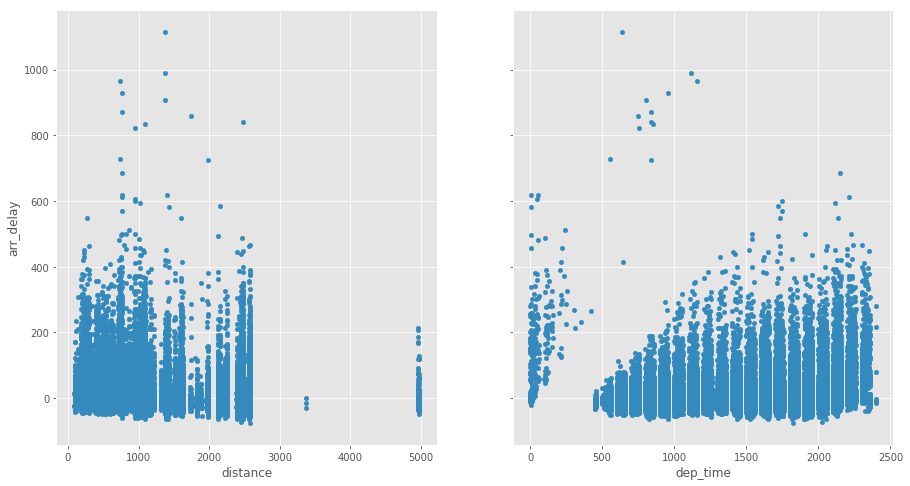

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

fig, (ax,bx) = plt.subplots(nrows=1, ncols=2,sharey=True)

flights.plot(x='distance',y='arr_delay',kind='scatter',ax=ax)
flights.plot(x='dep_time',y='arr_delay',kind='scatter',ax=bx)


# 3. Clasificación

Vamos a entrenar un clasificador para que prediga si el vuelo tiene o no "retraso importante". Para ello:
* Seleccione las columnas de _distancia recorrida_ y _hora real de salida_ como datos de entrada
* Seleccione la columna creada de "retraso importante" como dato de salida
* Separe los datos en conjunto de entrenamiento (75%) y conjunto de test (25%)
* Entrene un clasificador `RandomForest` con 100 árboles, usando el conjunto de entrenamiento
* Calcule la exactitud (`accuracy`) sobre el conjunto de test

<div class="alert alert-warning" role="alert" style="margin-top: 24pt; margin-bottom: 0pt;">Conteste en la siguiente celda</div>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

rs=check_random_state(256)

X=flights[['dep_time','distance']]
Y=flights['retraso_importante']

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=rs)

cl=RandomForestClassifier(n_estimators=100)
cl.fit(Xtrain,Ytrain)

Yp=cl.predict(Xtest)

accuracy_test=accuracy_score(Ytest,Yp)

print( "Exactitud (accuracy test)  =",accuracy_test )

Exactitud (accuracy test)  = 0.9145892147949662


# 4. Preguntas teóricas

Las siguientes preguntas son de contenido teórico, es decir, no precisan de realizar ningún tipo de código Python. Simplemente conteste a la pregunta en el recuadro marcado, razonando la respuesta

## 4.1 Sobreentrenamiento

Supongamos que tenemos un clasificador que usa un modelo con un nivel graduable de complejidad. Lo utilizamos para entrenar una clasificación con un dataset, y realizamos unos cuantos entrenamientos usando modelos con distinto grado de complejidad. Para evaluar medimos el error de clasificación tanto sobre el conjunto de entrenamiento como sobre el de test. El resultado es la siguiente gráfica que presenta los dos errores en función de la complejidad del modelo usado.

<img src="IMG/ml-python-ejercicio.png" style="width: 600px; padding: -100px;"/>

Pregunta: a la vista de la gráfica, ¿está nuestro clasificador sobreentrenando en algún momento? Explique su respuesta

<div class="alert alert-warning" role="alert" style="margin-top: 24pt; margin-bottom: 0pt;">Conteste en la siguiente celda</div>

*Respuesta*:
En mi opinion todavia no. Aunque el error de entrenamiento es cada vez menor y parece que el clasificador se ha adaptado muy bien a los datos de entrenamiento al aumentar la complejidad, el error de test ha disminuido tambien con el aumento de complejidad. Creo que visualmente podria apreciarse sobreentrenamiento cuando la pendiente de la curva del error de test dejara de ser negativa para acercarse a 0


## 4.2 Tipo de aprendizaje 

Una empresa de turismo ha conseguido un dataset de estancias de familias en hoteles que contiene, para cada familia:
* número de miembros
* país de origen
* edad de los padres
* gasto total durante la estancia

La empresa pretende, usando ese dataset, obtener un modelo que le permita predecir el gasto total de la familia a partir del número de miembros, país de origen y edad de los padres. ¿Qué tipo de aprendizaje lleva a cabo el modelo, de entre los vistos en la unidad 4.1? Explique su respuesta.

<div class="alert alert-warning" role="alert" style="margin-top: 24pt; margin-bottom: 0pt;">Conteste en la siguiente celda</div>

*Respuesta:*
En el dataset tenemos acceso a los datos objetivo por lo que podemos plantear un aprendizaje supervisado. Como no se pide categorizar sino inferir un valor cuantitativo no podemos elegir la clasificacion, sino la regresion